In [3]:
%pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 1.9 MB/s eta 0:00:30
    --------------------------------------- 1.0/56.8 MB 2.3 MB/s eta 0:00:25
   - -------------------------------------- 1.6/56.8 MB 2.0 MB/s eta 0:00:28
   - -------------------------------------- 1.6/56.8 MB 2.0 MB/s eta 0:00:28
   - -------------------------------------- 1.8/56.8 MB 1.8 MB/s eta 0:00:31
   - -------------------------------------- 2.4/56.8 MB 1.7 MB/s eta 0:00:33
   -- ------------------------------------- 2.9/56.8 MB 1.8 MB/s eta 0:00:30
   -- ------------------------------------- 3.1/56.8 MB 1.8 MB/s eta 0:00:30
   -- ------------------------------------- 3.7/56.8 MB 1.9 MB/s eta 0:00:28
   -- ------------------------------------- 4.2/56.8 MB 1.9 MB/s eta 0:00:28
   --- ------------------------------------ 4.5/56.8 MB 1.9 MB/s eta 0:00:28
   --- ------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, accuracy_score, f1_score, make_scorer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import chi2_contingency
from xgboost import XGBClassifier

In [7]:
df = pd.read_csv('C:/Users/yashh/datasets/cleaned_animal_disease_prediction.csv')
df.head()

,Animal_Type,Breed,Age,Gender,Weight,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Duration,...,Diarrhea,Coughing,Labored_Breathing,Lameness,Skin_Lesions,Nasal_Discharge,Eye_Discharge,Body_Temperature,Heart_Rate,Disease_Prediction
0,Dog,Labrador,4,Male,25.0,Fever,Lethargy,Appetite Loss,Vomiting,3 days,...,No,No,No,No,No,No,No,39.5°C,120,Parvovirus
1,Cat,Siamese,2,Female,4.5,Coughing,Sneezing,Eye Discharge,Nasal Discharge,1 week,...,No,Yes,No,No,No,Yes,Yes,38.9°C,150,Upper Respiratory Infection
2,Cow,Holstein,3,Female,600.0,Fever,Nasal Discharge,Labored Breathing,Coughing,5 days,...,No,Yes,Yes,No,No,Yes,No,40.1°C,90,Foot and Mouth Disease
3,Dog,Beagle,1,Male,10.0,Diarrhea,Vomiting,Lethargy,Appetite Loss,2 days,...,Yes,No,No,No,No,No,No,39.2°C,130,Gastroenteritis
4,Cat,Persian,5,Male,3.8,Lethargy,Appetite Loss,Skin Lesions,No,2 weeks,...,No,No,No,No,Yes,No,No,38.7°C,160,Fungal Infection


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Animal_Type         431 non-null    object 
 1   Breed               431 non-null    object 
 2   Age                 431 non-null    int64  
 3   Gender              431 non-null    object 
 4   Weight              431 non-null    float64
 5   Symptom_1           431 non-null    object 
 6   Symptom_2           431 non-null    object 
 7   Symptom_3           431 non-null    object 
 8   Symptom_4           431 non-null    object 
 9   Duration            431 non-null    object 
 10  Appetite_Loss       431 non-null    object 
 11  Vomiting            431 non-null    object 
 12  Diarrhea            431 non-null    object 
 13  Coughing            431 non-null    object 
 14  Labored_Breathing   431 non-null    object 
 15  Lameness            431 non-null    object 
 16  Skin_Les

In [21]:
df['Symptom_3'].value_counts()

Symptom_3
Lethargy                154
Loss of Appetite         99
Nasal Discharge          43
Appetite Loss            21
Fever                    18
Swollen Legs             14
Coughing                 14
Diarrhea                 13
Labored Breathing        11
Sneezing                  8
Weight Loss               8
Eye Discharge             7
Skin Lesions              6
Swollen Joints            4
Reduced Appetite          4
Decreased Milk Yield      3
Vomiting                  2
Dehydration               2
Name: count, dtype: int64

In [9]:
contingency_table = pd.crosstab(df['Animal_Type'], df['Symptom_1'])
contingency_table

Symptom_1,Appetite Loss,Coughing,Decreased Milk Yield,Diarrhea,Eye Discharge,Fever,Labored Breathing,Lameness,Lethargy,Loss of Appetite,Nasal Discharge,Skin Lesions,Sneezing,Swollen Joints,Vomiting,Weight Loss
Animal_Type,,,,,,,,,,,,,,,,
Cat,4,21,0,0,7,0,0,0,9,0,16,1,3,0,11,0
Cow,3,40,1,5,0,8,1,0,5,2,1,0,0,0,0,2
Dog,0,14,0,2,0,3,2,4,33,0,0,0,1,0,16,0
Goat,0,0,0,4,0,2,0,0,0,0,1,0,0,0,32,0
Horse,1,5,0,0,0,2,0,50,2,0,1,0,0,3,0,2
Pig,0,33,0,0,0,1,0,0,0,0,0,0,1,0,3,0
Rabbit,0,0,0,1,0,0,0,0,1,0,4,0,28,0,0,0
Sheep,0,28,0,0,0,0,0,1,2,0,0,0,0,5,0,3


In [10]:
# Chi-square contigency of dataset
chi2, p_value, dof, expected = chi2_contingency(contingency_table.values)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 1074.8845297668736
p-value: 1.5846329638707856e-160
Degrees of freedom: 105
Expected frequencies:
 [[ 1.33642691 23.55452436  0.16705336  2.00464037  1.16937355  2.67285383
   0.50116009  9.18793503  8.68677494  0.33410673  3.84222738  0.16705336
   5.51276102  1.33642691 10.35730858  1.16937355]
 [ 1.26218097 22.24593968  0.15777262  1.89327146  1.10440835  2.52436195
   0.47331787  8.6774942   8.20417633  0.31554524  3.6287703   0.15777262
   5.20649652  1.26218097  9.78190255  1.10440835]
 [ 1.39211137 24.53596288  0.17401392  2.08816705  1.21809745  2.78422274
   0.52204176  9.57076566  9.0487239   0.34802784  4.00232019  0.17401392
   5.7424594   1.39211137 10.78886311  1.21809745]
 [ 0.72389791 12.7587007   0.09048724  1.08584687  0.63341067  1.44779582
   0.27146172  4.97679814  4.70533643  0.18097448  2.0812065   0.09048724
   2.98607889  0.72389791  5.61020882  0.63341067]
 [ 1.225058   21.59164733  0.15313225  1.83758701  1.07192575  2.45011601
   0.4593

In [11]:
# Animal distribution
animal_dist = df['Animal_Type'].value_counts(normalize=True) * 100
print("Animal Distribution (%):")
print(animal_dist)

# Animal Type vs Gender
gender_dist = pd.crosstab(df['Animal_Type'], df['Gender'], normalize='index') * 100
print("\nGender Distribution by Animal Type (%):")
print(gender_dist)

Animal Distribution (%):
Animal_Type
Dog       17.401392
Cat       16.705336
Cow       15.777262
Horse     15.313225
Sheep      9.048724
Goat       9.048724
Pig        8.816705
Rabbit     7.888631
Name: proportion, dtype: float64

Gender Distribution by Animal Type (%):
Gender          Female       Male
Animal_Type                      
Cat          44.444444  55.555556
Cow          54.411765  45.588235
Dog          46.666667  53.333333
Goat         64.102564  35.897436
Horse        45.454545  54.545455
Pig          47.368421  52.631579
Rabbit       47.058824  52.941176
Sheep        33.333333  66.666667


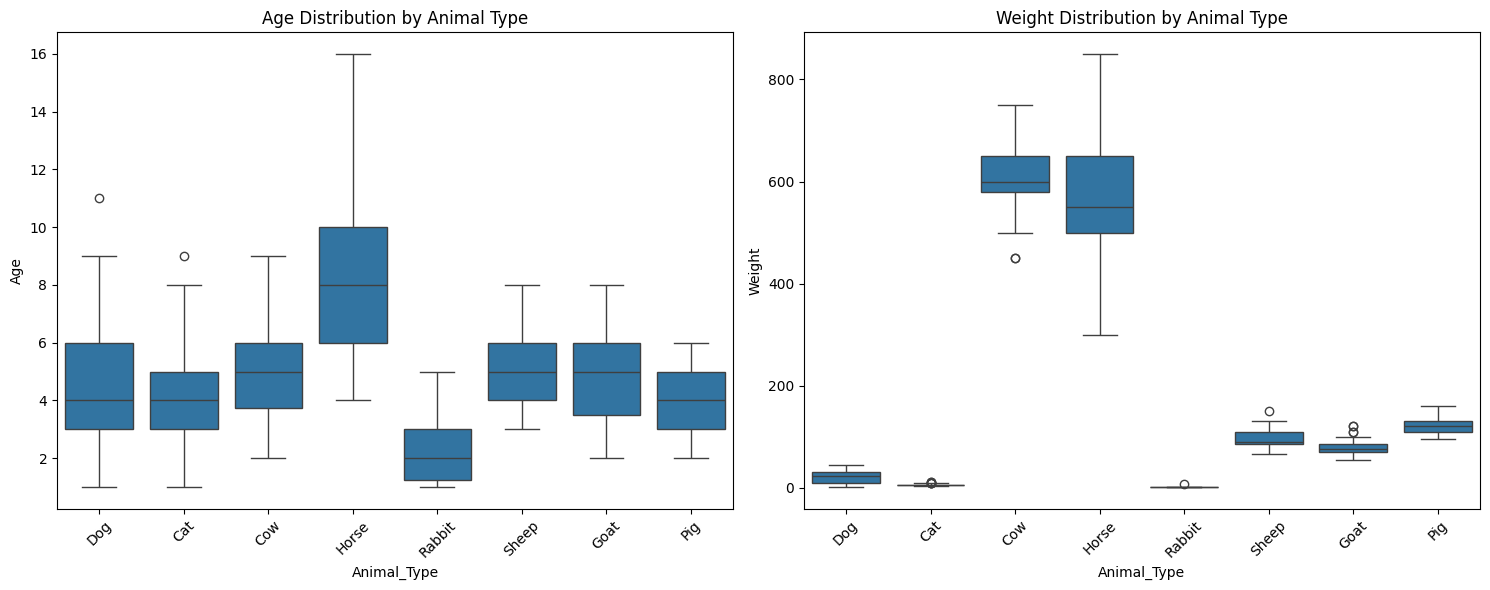

In [12]:
# Age and weight distributions by animal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='Animal_Type', y='Age', data=df, ax=ax1)
ax1.set_title('Age Distribution by Animal Type')
ax1.tick_params(axis='x', rotation=45)

sns.boxplot(x='Animal_Type', y='Weight', data=df, ax=ax2)
ax2.set_title('Weight Distribution by Animal Type')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


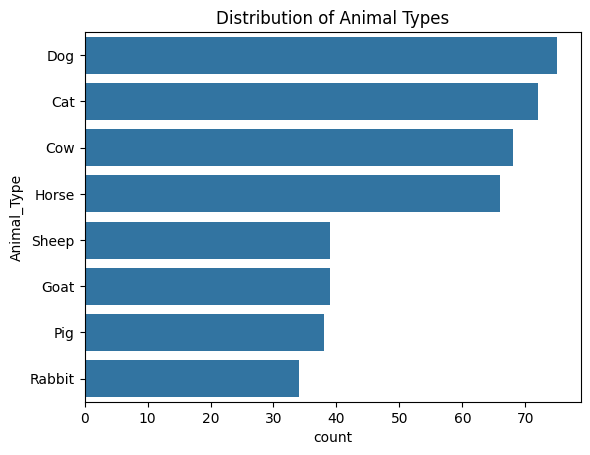

In [13]:
# Distribution of animals
sns.countplot(data=df, y='Animal_Type', order=df['Animal_Type'].value_counts().index)
plt.title('Distribution of Animal Types')
plt.show()

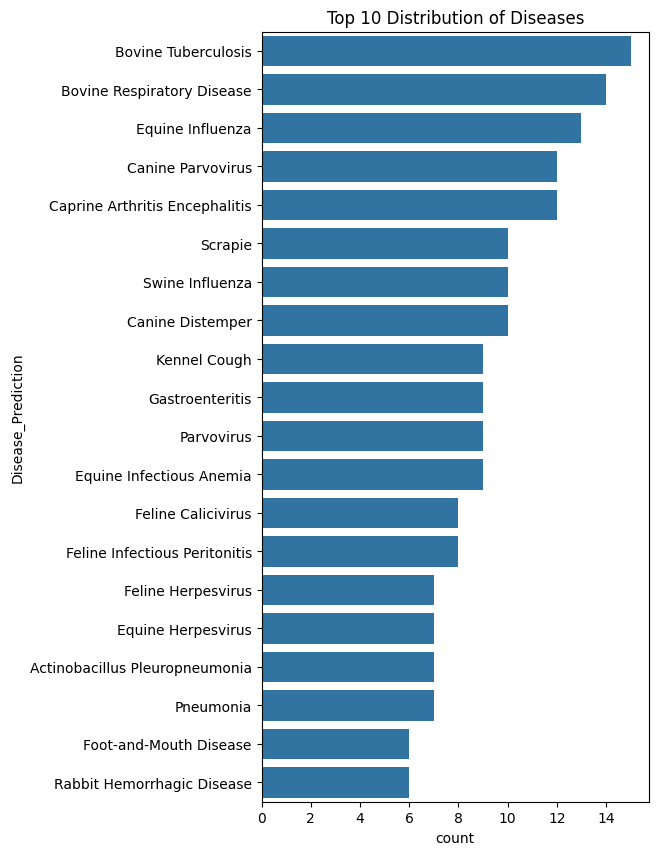

In [14]:
# Top 10 diseases
plt.figure(figsize=(5, 10))
sns.countplot(data=df, y='Disease_Prediction', order=df['Disease_Prediction'].value_counts().index[:20])
plt.title('Top 10 Distribution of Diseases')
plt.show()


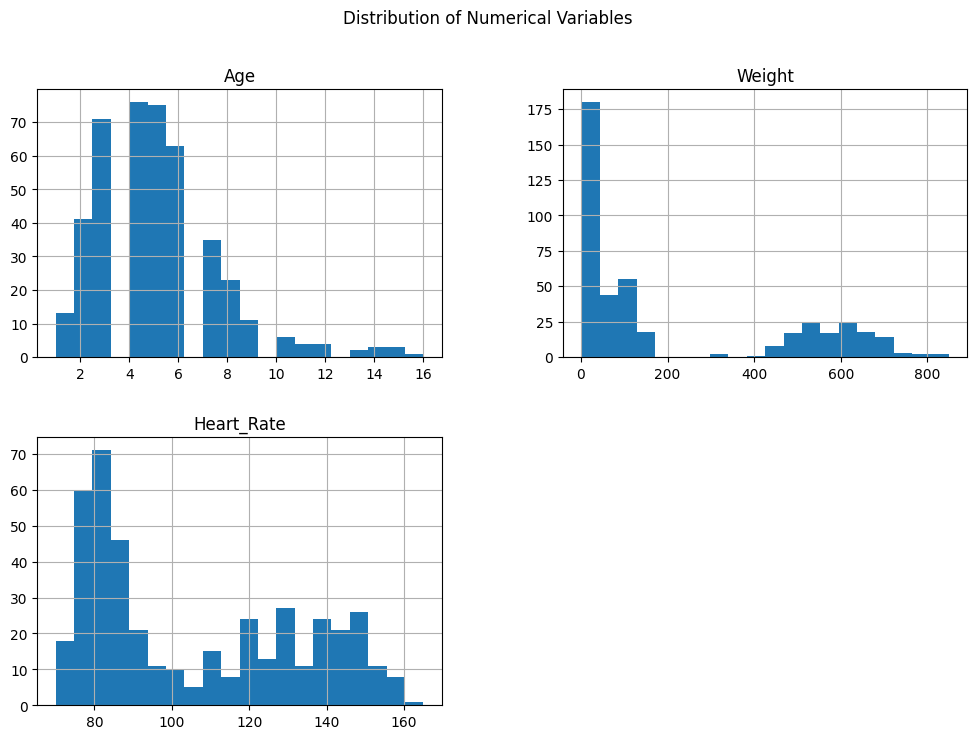

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of numerical columns
df[['Age', 'Weight', 'Heart_Rate', 'Body_Temperature']].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Numerical Variables')
plt.show()


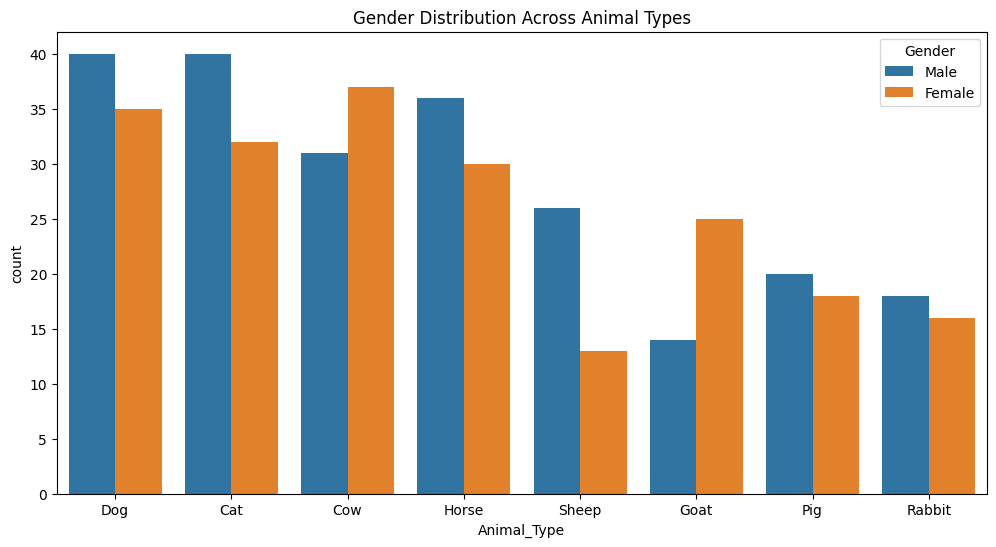

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Animal_Type', hue='Gender', order=df['Animal_Type'].value_counts().index)
plt.title('Gender Distribution Across Animal Types')
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\yashh\AppData\Local\Temp\ipykernel_30904\105604919.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['Duration_Num'] = df['Duration'].str.extract('(\d+)').astype(float)


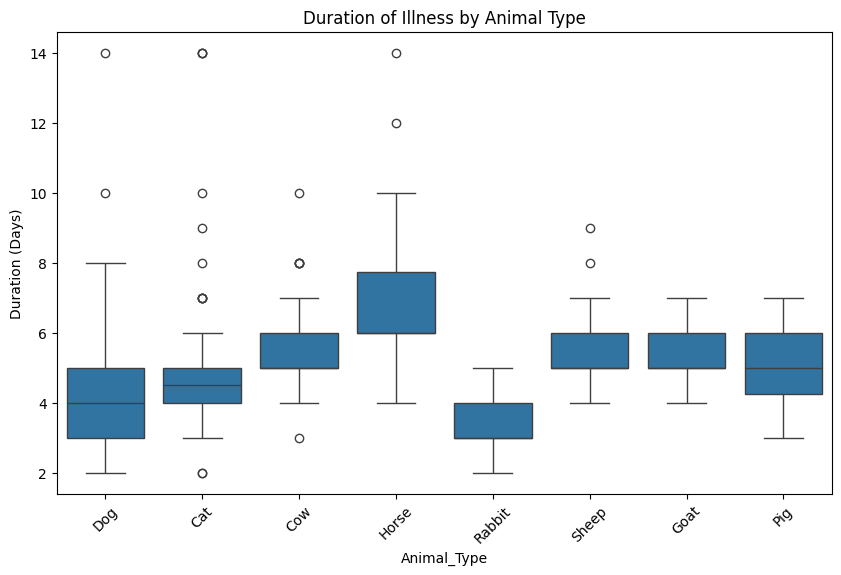

In [17]:
# Convert duration to numeric
df['Duration_Num'] = df['Duration'].str.extract('(\d+)').astype(float)
df.loc[df['Duration'].str.contains('week'), 'Duration_Num'] *= 7

plt.figure(figsize=(10, 6))
sns.boxplot(x='Animal_Type', y='Duration_Num', data=df)
plt.title('Duration of Illness by Animal Type')
plt.ylabel('Duration (Days)')
plt.xticks(rotation=45)
plt.show()